# Installation

- `pip install -r requirements.txt`

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sys
import os

# Add the path to the folder containing utils.py
sys.path.append(os.path.abspath('../app/helpers'))

import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\whjw1\\Documents\\GitHub\\PythonProjectsDirectory\\StockmarketTechnicalAnalyzer\\app\\helpers\\utils.py'>

# Data Retrieval

Possible user inputs are:

- `tickers`
- `start_date`
- `end_date`

[What are the stock sectors?](https://www.schwab.com/learn/story/what-are-stock-sectors)

| Ticker | Company | Sector |
|:---|:---| :---|
| KO | Coca-Cola | Consumer Staples |
| PEP | Pepsi | Consumer Staples |
| WMT | Walmart | Consumer Staples |
| SBUX | Starbucks | Consumer Discretionary |
| MCD | McDonald's | Consumer Discretionary |
| AAL | American Airlines | Industrials |
| DAL | Delta Airlines | Industrials |
| F | Ford Motors | Industrials |
| VZ | Verizon | Communication Services |
| T | AT&T | Communication Services |
| DIS | Disney | Communication Services |
| BAC | Bank of America | Financials |
| JPM | JP Morgan | Financials |
| MA | Mastercard | Financials |
| V | Visa | Financials |
| ORCL | Oracle | Information Technology |
| AMD | AMD | Information Technology |
| NVDA | Nvidia | Information Technology |
| AAPL | Apple | Information Technology |
| MSFT | Microsoft | Information Technology |

In [2]:
# user to decide this parameters
TICKERS = [
    'KO','PEP','WMT', # consumer staples
    'SBUX','MCD', # consumer discretionary
    'AAL','DAL','F', # industrials
    'VZ', 'T', 'DIS', # communication services
    'BAC','JPM','MA','V', # financials
    'ORCL','AMD','NVDA','AAPL','MSFT', # information technology
] 
START_DATE = "2000-01-01"
END_DATE = "2024-07-31"

Documentation: [yfinance](https://github.com/ranaroussi/yfinance/wiki/Tickers#parameters)

In [3]:
df = yf.download(tickers=TICKERS, interval="1d", start=START_DATE, end=END_DATE, auto_adjust=True, group_by='ticker')
df.head() # see how the raw data format looks

[*********************100%***********************]  20 of 20 completed


Ticker                     DAL                        AAL                 \
Price                     Open High Low Close Volume Open High Low Close   
Date                                                                       
2000-01-03 00:00:00+00:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2000-01-04 00:00:00+00:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2000-01-05 00:00:00+00:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2000-01-06 00:00:00+00:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2000-01-07 00:00:00+00:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   

Ticker                            ...      SBUX                                \
Price                     Volume  ...      Open      High       Low     Close   
Date                              ...                                           
2000-01-03 00:00:00+00:00    NaN  ...  2.302099  2.380443  2.241834  2.377429   
2000-01-04 00:00:00+00:00    NaN  ...  2.320177  2.398521  2.290045  2.302098   
2000-01-05 00:00:00+00:00    NaN  ...  2.308125  2.374415  2.284019  2.332230   
2000-01-06 00:00:00+00:00    NaN  ...  2.314151  2.470839  2.314151  2.416601   
2000-01-07 00:00:00+00:00    NaN  ...  2.386468  2.410574  2.338257  2.404548   

Ticker                                      T                                \
Price                        Volume      Open      High       Low     Close   
Date                                                                          
2000-01-03 00:00:00+00:00  24232000  6.914797  6.977093  6.638917  6.692314   
2000-01-04 00:00:00+00:00  21564800  6.701214  6.799107  6.193950  6.300743   
2000-01-05 00:00:00+00:00  28206400  6.407536  6.443134  6.327441  6.398636   
2000-01-06 00:00:00+00:00  30825600  6.391191  6.453937  6.185023  6.274662   
2000-01-07 00:00:00+00:00  26044800  6.391186  6.418078  6.220874  6.328439   

Ticker                               
Price                        Volume  
Date                                 
2000-01-03 00:00:00+00:00   7668476  
2000-01-04 00:00:00+00:00   9497846  
2000-01-05 00:00:00+00:00  12035160  
2000-01-06 00:00:00+00:00   9471366  
2000-01-07 00:00:00+00:00   7792534  

[5 rows x 100 columns]

In [4]:
# reformat for easy read from store
df = df.stack(level='Ticker')
df.columns = [s.lower() for s in df.columns]
df.index.names = [s.lower() for s in df.index.names]
df.reset_index(inplace=True)
df.head()

C:\Users\whjw1\AppData\Local\Temp\ipykernel_9480\4229889244.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level='Ticker')


,date,ticker,open,high,low,close,volume
0,2000-01-03 00:00:00+00:00,AAPL,0.790753,0.848245,0.766720,0.844004,535796800.0
1,2000-01-03 00:00:00+00:00,AMD,14.968750,15.593750,14.687500,15.500000,7843200.0
2,2000-01-03 00:00:00+00:00,BAC,13.263149,13.263149,12.669277,12.784752,13705800.0
3,2000-01-03 00:00:00+00:00,DIS,22.454559,22.982337,22.070720,22.934357,8402230.0
4,2000-01-03 00:00:00+00:00,F,12.593090,12.697535,12.443883,12.503566,4056814.0


In [5]:
# download the benchmark data for reference later
spy = yf.download(tickers='SPY', interval="1d", start=START_DATE, end=END_DATE, auto_adjust=True)
spy.reset_index(inplace=True)
spy.columns = [c.lower() for c in spy.columns]
if not spy.isnull().sum().any():
    spy.to_csv('../app/static/data/spy.csv', index=False)
    print("Saved to data/spy.csv")

[*********************100%***********************]  1 of 1 completed

Saved to data/spy.csv


In [6]:
spy = pd.read_csv('../app/static/data/spy.csv', parse_dates=['date'])
spy.set_index('date', inplace=True)
spy

,open,high,low,close,volume
date,,,,,
2000-01-03,94.803469,94.803469,92.005728,93.004921,8164300
2000-01-04,91.785891,92.125617,89.297900,89.367844,8089800
2000-01-05,89.487712,90.506888,87.769100,89.527679,12177900
2000-01-06,89.287914,90.486946,88.088882,88.088882,6227200
2000-01-07,89.727557,93.204750,89.567686,93.204750,8066500
...,...,...,...,...,...
2024-07-24,547.181624,547.490674,538.637823,539.574951,74515300
2024-07-25,539.694562,545.785924,535.806524,536.763550,61158300
2024-07-26,540.621778,545.516737,539.834155,542.775146,53763800


In [7]:
# just a performance statistic of buying and holding the S&P 500 for the entire period
utils.benchmark_performance(spy, START_DATE, END_DATE)

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 6181
'Up' days: 3357 (54.31%)
'Down' days: 2803 (45.35%)
Total Return: 480.98%
Annualised Volatility: 19.47%
Maximum Drawdown: -55.19%
Profit Factor: 1.073
Average Profit: 0.008
Average Loss: 0.009


# Data Cleaning

Check for any missing values before storing for further processing.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116687 entries, 0 to 116686
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    116687 non-null  datetime64[ns, UTC]
 1   ticker  116687 non-null  object             
 2   open    116687 non-null  float64            
 3   high    116687 non-null  float64            
 4   low     116687 non-null  float64            
 5   close   116687 non-null  float64            
 6   volume  116687 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 6.2+ MB


In [9]:
df.isnull().sum()

date      0
ticker    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

No missing values to fill. Market holidays have been automatically excluded.

# Data Store

In [10]:
# format is just a csv file with column names above
df.to_csv('../app/static/data/ohlcv.csv', index=False)

# Data Processing

Construct the indicators' values for each stock.

In [11]:
# load the data into proper format for processing
df = pd.read_csv('../app/static/data/ohlcv.csv', parse_dates=['date'])
df.set_index(['date', 'ticker'], inplace=True)
df.head()

open       high        low      close  \
date                      ticker                                               
2000-01-03 00:00:00+00:00 AAPL     0.790753   0.848245   0.766720   0.844004   
                          AMD     14.968750  15.593750  14.687500  15.500000   
                          BAC     13.263149  13.263149  12.669277  12.784752   
                          DIS     22.454559  22.982337  22.070720  22.934357   
                          F       12.593090  12.697535  12.443883  12.503566   

                                       volume  
date                      ticker               
2000-01-03 00:00:00+00:00 AAPL    535796800.0  
                          AMD       7843200.0  
                          BAC      13705800.0  
                          DIS       8402230.0  
                          F         4056814.0

Documentation: [pandas-ta](https://twopirllc.github.io/pandas-ta/)

In [12]:
def contruct_indicators(group):

    # indicator: Simple Moving Averages
    group['sma_5'] = ta.sma(group['close'], length=5)
    group['sma_10'] = ta.sma(group['close'], length=10)
    group['sma_21'] = ta.sma(group['close'], length=21)
    group['sma_50'] = ta.sma(group['close'], length=50)
    group['sma_100'] = ta.sma(group['close'], length=100)
    group['sma_200'] = ta.sma(group['close'], length=200)

    # indicator: Exponential Moving Averages
    group['ema_5'] = ta.ema(group['close'], length=5)
    group['ema_10'] = ta.ema(group['close'], length=10)
    group['ema_21'] = ta.ema(group['close'], length=21)
    group['ema_50'] = ta.ema(group['close'], length=50)
    group['ema_100'] = ta.ema(group['close'], length=100)
    group['ema_200'] = ta.ema(group['close'], length=200)

    # indicator: normalized volume
    group['norm_volume_3'] = group['volume'] / group['volume'].rolling(3).median()
    group['norm_volume_5'] = group['volume'] / group['volume'].rolling(5).median()
    group['norm_volume_10'] = group['volume'] / group['volume'].rolling(10).median()
    group['norm_volume_21'] = group['volume'] / group['volume'].rolling(21).median()
    group['norm_volume_50'] = group['volume'] / group['volume'].rolling(50).median()

    # indicator: Relative Strength Index
    group['rsi_7'] = ta.rsi(group['close'], length=7)
    group['rsi_9'] = ta.rsi(group['close'], length=9)
    group['rsi_10'] = ta.rsi(group['close'], length=10)
    group['rsi_14'] = ta.rsi(group['close'], length=14)
    

    # indicator: Average Directional Index
    adx_result = ta.adx(group['high'], group['low'], group['close'], length=3)
    group['adx_3'] = adx_result['ADX_3']
    group['+DI_3'] = adx_result['DMP_3']  # +DI
    group['-DI_3'] = adx_result['DMN_3']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=5)
    group['adx_5'] = adx_result['ADX_5']
    group['+DI_5'] = adx_result['DMP_5']  # +DI
    group['-DI_5'] = adx_result['DMN_5']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=7)
    group['adx_7'] = adx_result['ADX_7']
    group['+DI_7'] = adx_result['DMP_7']  # +DI
    group['-DI_7'] = adx_result['DMN_7']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=14)
    group['adx_14'] = adx_result['ADX_14']
    group['+DI_14'] = adx_result['DMP_14']  # +DI
    group['-DI_14'] = adx_result['DMN_14']  # -DI

    # indicator: Bollinger Bands
    bband_result = ta.bbands(group['close'])
    group['bb_5_lb'] = bband_result['BBL_5_2.0']
    group['bb_5_mb'] = bband_result['BBM_5_2.0']
    group['bb_5_ub'] = bband_result['BBU_5_2.0']
    group['bb_5_bw'] = bband_result['BBB_5_2.0']
    group['bb_5_p'] = bband_result['BBP_5_2.0']

    return group

def log_returns(group, periods=[1]):
    # daily log return
    group['log_return'] = np.log(group['close']) -  np.log(group['close'].shift(1))
    return group

In [13]:
ta.bbands(df.xs('KO', level='ticker')['close'])

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
date,,,,,
2000-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+00:00,13.580786,14.404781,15.228776,11.440579,0.994043
...,...,...,...,...,...
2024-07-24 00:00:00+00:00,64.059018,64.760028,65.461038,2.164946,0.929289
2024-07-25 00:00:00+00:00,63.954594,64.934830,65.915065,3.019136,0.849560
2024-07-26 00:00:00+00:00,63.651514,65.284433,66.917352,5.002475,0.900824


In [14]:
df_returns = df.groupby('ticker', group_keys=False).apply(log_returns)
df_indicators = df_returns.groupby('ticker', group_keys=False).apply(contruct_indicators)
df_indicators

open        high         low  \
date                      ticker                                       
2000-01-03 00:00:00+00:00 AAPL      0.790753    0.848245    0.766720   
                          AMD      14.968750   15.593750   14.687500   
                          BAC      13.263149   13.263149   12.669277   
                          DIS      22.454559   22.982337   22.070720   
                          F        12.593090   12.697535   12.443883   
...                                      ...         ...         ...   
2024-07-30 00:00:00+00:00 SBUX     74.797930   75.593127   74.400332   
                          T        18.950001   19.030001   18.840000   
                          V       262.703201  263.771036  260.487642   
                          VZ       40.009998   40.259998   39.830002   
                          WMT      69.352317   69.651460   68.783937   

                                       close       volume  log_return  \
date                      ticker                                        
2000-01-03 00:00:00+00:00 AAPL      0.844004  535796800.0         NaN   
                          AMD      15.500000    7843200.0         NaN   
                          BAC      12.784752   13705800.0         NaN   
                          DIS      22.934357    8402230.0         NaN   
                          F        12.503566    4056814.0         NaN   
...                                      ...          ...         ...   
2024-07-30 00:00:00+00:00 SBUX     75.483788   16163600.0    0.009792   
                          T        18.980000   27855000.0    0.004224   
                          V       262.573456    5941800.0    0.005717   
                          VZ       40.040001   16089200.0    0.000250   
                          WMT      68.993340   12522500.0   -0.006196   

                                       sma_5      sma_10      sma_21  \
date                      ticker                                       
2000-01-03 00:00:00+00:00 AAPL           NaN         NaN         NaN   
                          AMD            NaN         NaN         NaN   
                          BAC            NaN         NaN         NaN   
                          DIS            NaN         NaN         NaN   
                          F              NaN         NaN         NaN   
...                                      ...         ...         ...   
2024-07-30 00:00:00+00:00 SBUX     74.189606   75.002691   74.646463   
                          T        19.048000   18.943000   18.783862   
                          V       257.896838  262.661288  264.399798   
                          VZ       39.956000   40.348000   40.647419   
                          WMT      69.643486   70.084230   69.577865   

                                      sma_50  ...      +DI_7      -DI_7  \
date                      ticker              ...                         
2000-01-03 00:00:00+00:00 AAPL           NaN  ...        NaN        NaN   
                          AMD            NaN  ...        NaN        NaN   
                          BAC            NaN  ...        NaN        NaN   
                          DIS            NaN  ...        NaN        NaN   
                          F              NaN  ...        NaN        NaN   
...                                      ...  ...        ...        ...   
2024-07-30 00:00:00+00:00 SBUX     77.282909  ...  20.559954  18.754751   
                          T        18.150410  ...  30.605931  20.805907   
                          V       269.264647  ...  22.747216  25.688501   
                          VZ       40.100252  ...  29.096968  25.778490   
                          WMT      67.662334  ...  11.174293  25.683480   

                                     adx_14     +DI_14     -DI_14     bb_5_lb  \
date                      ticker                                                
2000-01-03 00:00:00+00:00 AAPL          NaN        NaN        NaN         NaN 

# Data Analysis and Visualization

In this section, we attempt to identify possible patterns from the technical indicators e.g. Moving Average Crossover. \
For it to be meaningful, we analyse the signals generated by the indicators with respect to future returns over some period.

Possible WebApp Framework for Interactive Visualisation: [Dash](https://dash.plotly.com/?_gl=1*ta35r5*_gcl_au*Mjk1MjQ3NTI2LjE3MjY5MjA3ODU.*_ga*Nzk0MzAyNTg4LjE3MjY5MjA3ODY.*_ga_6G7EE0JNSC*MTcyNjkyMDc4NS4xLjAuMTcyNjkyMDc4NS42MC4wLjA)

Difference between Dash and Plotly: [here](https://stackoverflow.com/questions/53146357/whats-the-difference-between-dash-and-plotly)

In [15]:
# possibly a dropdown to let user select ticker to visualize
TICKER = 'KO'
data = df_indicators.xs(level='ticker', key=TICKER)
data

,open,high,low,close,volume,log_return,sma_5,sma_10,sma_21,sma_50,...,+DI_7,-DI_7,adx_14,+DI_14,-DI_14,bb_5_lb,bb_5_mb,bb_5_ub,bb_5_bw,bb_5_p
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,14.530043,14.530043,13.841119,14.122952,10997000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,14.122947,14.232548,13.935058,14.138604,7308000.0,0.001108,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+00:00,14.138608,14.389126,14.044664,14.263867,9457400.0,0.008821,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+00:00,14.263865,14.451753,14.169920,14.279522,7129200.0,0.001097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+00:00,14.498720,15.218959,14.498720,15.218959,11474000.0,0.063715,14.404781,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.580786,14.404781,15.228776,11.440579,0.994043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24 00:00:00+00:00,64.646802,65.520815,64.388577,65.361900,13244600.0,0.013000,64.760028,64.131339,63.524500,62.724648,...,29.265304,9.634904,23.045818,28.192967,12.158041,64.059018,64.760028,65.461038,2.164946,0.929289
2024-07-25 00:00:00+00:00,65.590338,66.434549,65.411563,65.620132,16328600.0,0.003943,64.934830,64.426316,63.629967,62.783833,...,38.025245,8.125572,24.954946,33.120380,11.106880,63.954594,64.934830,65.915065,3.019136,0.849560
2024-07-26 00:00:00+00:00,65.620130,66.653049,65.560541,66.593460,13530100.0,0.014724,65.284433,64.759035,63.771851,62.871945,...,35.196473,6.850403,26.875231,31.983903,10.144820,63.651514,65.284433,66.917352,5.002475,0.900824


### Strategy 1: EMA Crossover

EMA(21) crossing over the EMA(50) is generally seen as a bullish signal.

This strategy simply takes a long position when it occurs and holds it for K number of days (profiting/losing the K-day returns).

In [16]:
# required indicators
strategy = data[['log_return','ema_21', 'ema_50']].dropna().copy()
# strategy signal
strategy['signal'] = (strategy ['ema_21'] > strategy['ema_50']).astype(np.int32)

In [17]:
strategy['2d_log_return'] = strategy['log_return'].rolling(2).sum()
strategy['3d_log_return'] = strategy['log_return'].rolling(3).sum()
strategy['4d_log_return'] = strategy['log_return'].rolling(4).sum()
strategy['5d_log_return'] = strategy['log_return'].rolling(5).sum()
strategy['7d_log_return'] = strategy['log_return'].rolling(7).sum()
strategy['10d_log_return'] = strategy['log_return'].rolling(10).sum()
strategy.dropna(inplace=True)

In [18]:
K = 7 # can change the number here as desired
strategy['target'] = strategy[f'{K}d_log_return'].shift(-K)  
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [19]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
utils.benchmark_performance(data, start_date, end_date)
utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1722 (52.64%)
'Down' days: 1515 (46.32%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
=========================== STRATEGY PERFORMANCE ===========================
Trades: 2183
'Up' days: 1234 (56.53%)
'Down' days: 937 (42.92%)
Total Return: 752.14%
Annualised Volatility: 33.73%
Maximum Drawdown: -80.27%
Profit Factor: 1.107
Average Profit: 0.018
Average Loss: 0.021


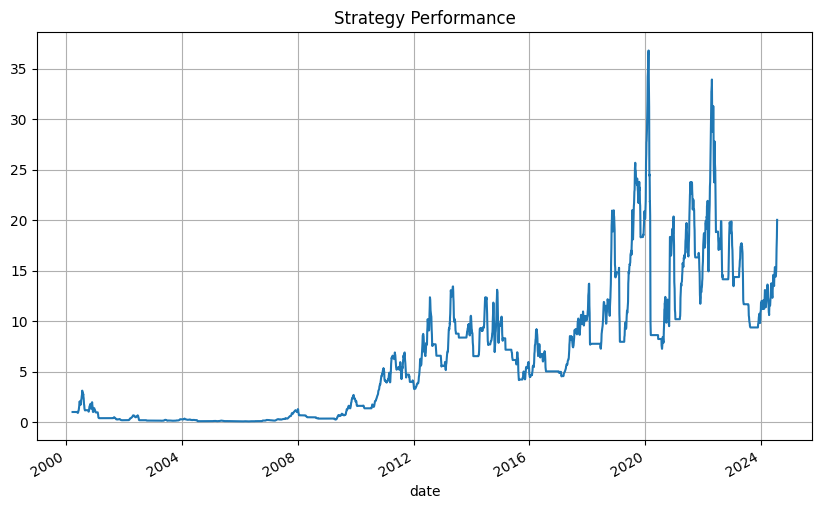

In [20]:
# visualize the performance of the strategy
(strategy.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

### Strategy 2: EMA Crossover + RSI

Additional and RSI value below (above) 30 (70) is generally seen as oversold (overbought).

A moving from below 30 (above 70) to above (below) it is seen as a bullish (bearish indicator). We try to overlay these two indicators to improve performance.

In [21]:
# required indicators
strategy = data[
    [
        'close', 'volume', 'log_return',
        'ema_5', 'ema_10','ema_21', 'ema_50',
        'rsi_7', 'rsi_9', 'rsi_10', 'rsi_14',
    ]
].dropna()

K = 7 # using the same K=7 as before
RSI_K = 14

# strategy idea
# by adding more indicators as a filters, we should expect lesser trades and perhaps less volatility than previous strategy
strategy['signal'] = (
    (strategy['ema_21'] > strategy['ema_50']) & 
    (strategy[f'rsi_{RSI_K}'] < 50)
).astype(np.int32)

strategy['target'] = strategy['log_return'].rolling(K).sum().shift(-K)
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [22]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
utils.benchmark_performance(data, start_date, end_date)
utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1722 (52.64%)
'Down' days: 1515 (46.32%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
=========================== STRATEGY PERFORMANCE ===========================
Trades: 482
'Up' days: 285 (59.13%)
'Down' days: 195 (40.46%)
Total Return: 296.87%
Annualised Volatility: 18.36%
Maximum Drawdown: -58.56%
Profit Factor: 1.303
Average Profit: 0.021
Average Loss: 0.023


<!-- Notice that the volatility and maximum drawndown is much lesser now, which is desirable.

But as this signal occurs rarely, the number of trades decreases a lot as well. 

Nonetheless, this strategy can be a great addition to an arsenal of strategies. -->

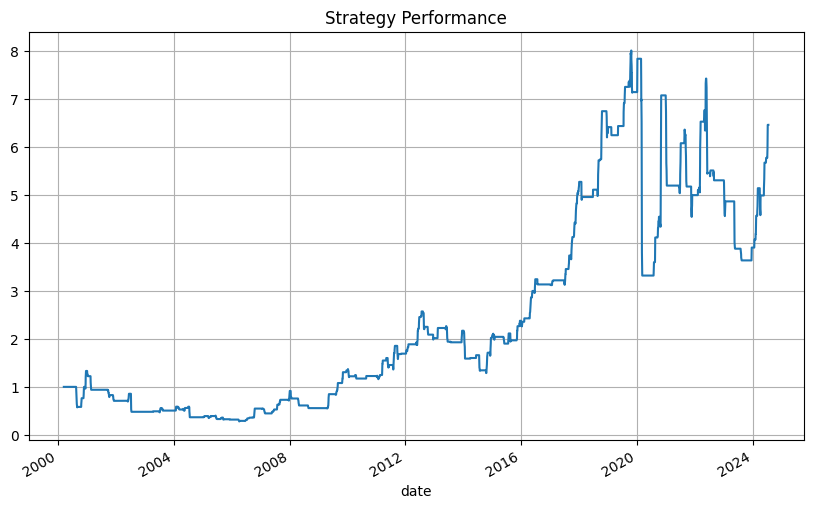

In [23]:
# visualize the performance of the strategy
(strategy.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

### Strategy 3: RSI + ADX

In [24]:
# required indicators
strategy = data[
    [
        'close', 'volume', 'log_return',
        'rsi_7', 'rsi_9', 'rsi_10', 'rsi_14',
        'adx_3', 'adx_5', 'adx_7', 'adx_14',

    ]
].dropna()

K = 7 # using the same K=7 as before
RSI_K = 14
ADX_K = 14

# strategy idea
# by adding more indicators as a filters, we should expect lesser trades and perhaps less volatility
strategy['signal'] = (
    (strategy[f'rsi_{RSI_K}'] < 45) &
    (strategy[f'adx_{ADX_K}'] > 30)
).astype(np.int32)

strategy['target'] = strategy['log_return'].rolling(K).sum().shift(-K)
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [25]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
utils.benchmark_performance(data, start_date, end_date)
utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1722 (52.64%)
'Down' days: 1515 (46.32%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
=========================== STRATEGY PERFORMANCE ===========================
Trades: 166
'Up' days: 115 (69.28%)
'Down' days: 51 (30.72%)
Total Return: 247.02%
Annualised Volatility: 19.55%
Maximum Drawdown: -83.50%
Profit Factor: 1.537
Average Profit: 0.031
Average Loss: 0.045


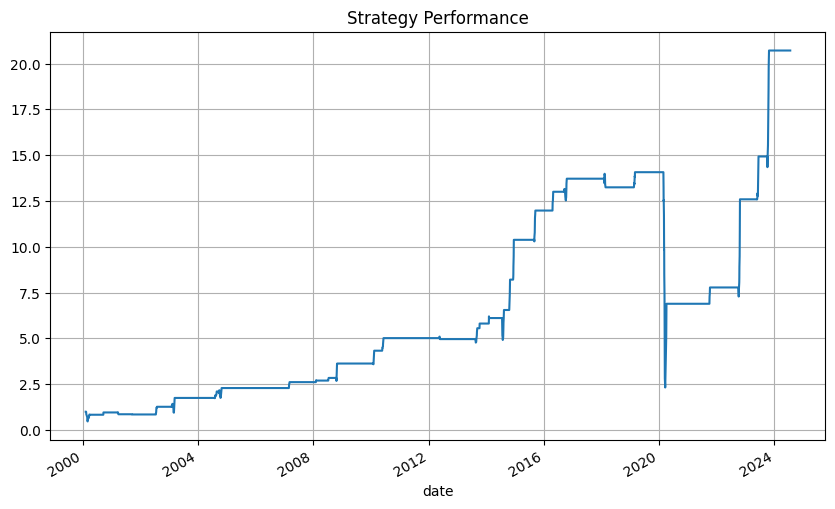

In [26]:
# visualize the performance of the strategy
(strategy.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

### Strategy 4: Machine Learning + Technical Indicators

Improvement of Strategy 1. The signal EMA(21) > EMA(50) will be the condition for the model to be applied as a filter.
The model learns the validity of the signal from other technical indicator and features such as normalised volumes, bollinger bands, distance between prices from the bounds of the bollinger bands etc.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [28]:
# create features (independent variables) and target (dependent variable)
strategy = data[
    [
        'close', 'log_return',
        'ema_5', 'ema_10', 'ema_21','ema_50',
        'rsi_14',
        'adx_14',
        'norm_volume_5','norm_volume_10','norm_volume_21',
        'bb_5_lb', 'bb_5_ub', 'bb_5_mb', 'bb_5_bw', 'bb_5_p'
    ]
].dropna()

strategy['x1'] = strategy['bb_5_ub'] - strategy['close']
strategy['x2'] = strategy['close'] - strategy['bb_5_mb']
strategy['x3'] = strategy['close'] - strategy['bb_5_lb'] 
strategy['x4'] = strategy['close'] - strategy['ema_10']
strategy['x5'] = strategy['ema_10'] - strategy['ema_21']
strategy['x6'] = strategy['ema_21'] - strategy['ema_50']

# create target variable to predict - idea is that since the default strategy would not be 100% accurate
# we will use the machine learning model to learn and filter out the signals using information from other indicators
K = 7 # using the same K=7 as before
RSI_K = 14

strategy['signal'] = (
    strategy['ema_21'] > strategy['ema_50']
).astype(np.int32)
strategy['returns'] = np.exp(strategy['signal'] * strategy['log_return'].rolling(K).sum().shift(-K)) - 1
strategy.dropna(inplace=True)

dataset = strategy[strategy.signal == 1].copy()
dataset['target'] = (dataset.returns > 0).astype(np.int32)

# train-test split
TRAIN_END = '2022-12-31' # define last period of training date
TEST_PERIOD_WEEKS = 52
TEST_START = str((pd.to_datetime(TRAIN_END) + pd.Timedelta(value=TEST_PERIOD_WEEKS, unit='W')).date())
train = dataset.loc[:TRAIN_END]
test = dataset.loc[TEST_START:]

# train the model 
FEATURES = ['rsi_14', 'adx_14', 'bb_5_bw', 'bb_5_p','norm_volume_5', 'norm_volume_10','x1', 'x2', 'x3', 'x4', 'x5', 'x6']
train_X, train_y = train[FEATURES], train['target']
model = RandomForestClassifier() # instantiate the model 
model.fit(train_X, train_y) # this api call trains the model

RandomForestClassifier()

In [29]:
# evaluate the model accuracy
test_X, test_y = test[FEATURES], test['target']
y_pred = model.predict(test_X)
acc = accuracy_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print(f"Model Accuracy: {acc*100:.2f}%")
# print(f"Model F1-Score: {f1:.2f}")

Model Accuracy: 64.39%


In [30]:
# without using model
out_of_sample_without_model = strategy[strategy.signal == 1].loc[TEST_START:]
utils.strategy_peformance(out_of_sample_without_model)

=========================== STRATEGY PERFORMANCE ===========================
Trades: 132
'Up' days: 73 (55.30%)
'Down' days: 59 (44.70%)
Total Return: 69.77%
Annualised Volatility: 29.40%
Maximum Drawdown: -22.24%
Profit Factor: 1.669
Average Profit: 0.018
Average Loss: 0.013


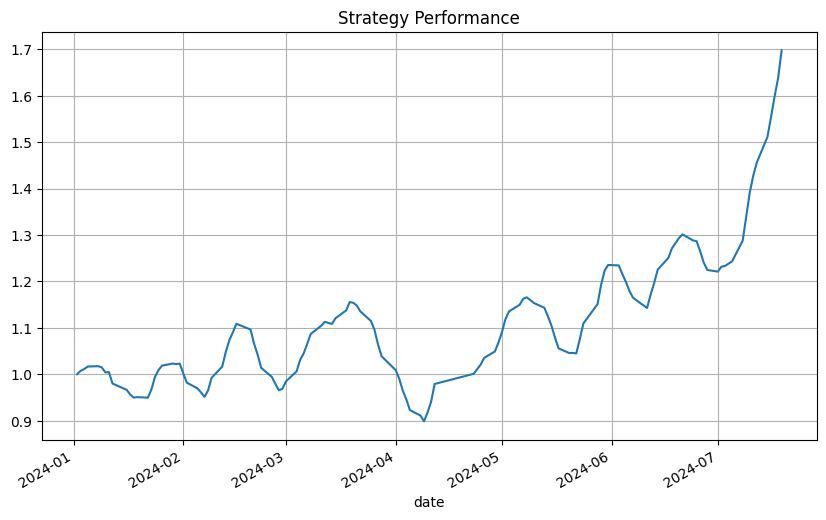

In [31]:
# visualize the performance of the strategy without using model
(out_of_sample_without_model.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

In [33]:
# strategy performance using the model
# notice the large decrease in maximum drawdown, the model was able to filter our drastic false signals
# winning rate has also improved a lot
out_of_sample_with_model = strategy[strategy.signal == 1].loc[TEST_START:].copy()
out_of_sample_with_model['signal'] = y_pred
out_of_sample_with_model = out_of_sample_with_model[out_of_sample_with_model.signal == 1]
utils.strategy_peformance(out_of_sample_with_model)

=========================== STRATEGY PERFORMANCE ===========================
Trades: 74
'Up' days: 50 (67.57%)
'Down' days: 24 (32.43%)
Total Return: 78.54%
Annualised Volatility: 29.24%
Maximum Drawdown: -13.06%
Profit Factor: 2.659
Average Profit: 0.019
Average Loss: 0.015


In [34]:
utils.benchmark_performance(spy, '2024-01-01', '2024-07-20') # and we kind of beat the index as well

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 137
'Up' days: 81 (59.12%)
'Down' days: 56 (40.88%)
Total Return: 16.89%
Annualised Volatility: 10.72%
Maximum Drawdown: -5.35%
Profit Factor: 1.549
Average Profit: 0.005
Average Loss: 0.005


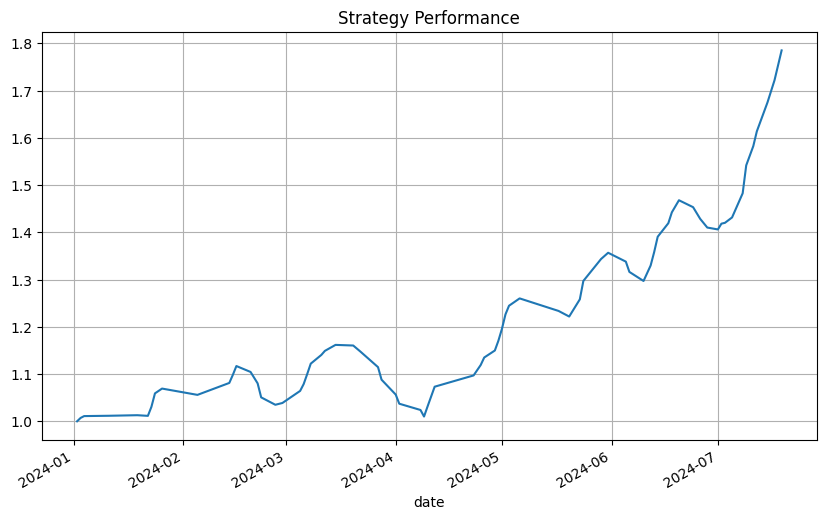

In [35]:
# visualize the performance of the strategy using model - notice the fewer sharp drops throughout the period
(out_of_sample_with_model.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

### Simple Price Chart Visualisation

In [36]:
# TO BE REFINED LATER ON IF NEED BE:

# Create subplots: 2 rows, 1 column with shared x-axis
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3],  # Relative heights of the subplots
    subplot_titles=[f'Candlestick with SMA for {TICKER}', 'RSI and ADX']
)

# Add candlestick trace to the first row
fig.add_trace(
    go.Candlestick(
        x=data.index,
        open=data['open'],
        high=data['high'],
        low=data['low'],
        close=data['close'],
        name='Candlestick'
    ),
    row=1, col=1
)

# Add moving average trace to the first row
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['sma_10'],
        mode='lines',
        name='SMA(10)',
        line=dict(color='green', width=1)
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['sma_21'],
        mode='lines',
        name='SMA(21)',
        line=dict(color='blue', width=1)
    ),
    row=1, col=1
)

# Add RSI trace to the second row
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['rsi_7'],
        mode='lines',
        name='RSI 7',
        line=dict(color='purple', width=2)
    ),
    row=2, col=1
)

# # Add ADX trace to the second row
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['adx_14'],
        mode='lines',
        name='ADX 14',
        line=dict(color='green', width=2)
    ),
    row=2, col=1
)

# Update layout for the subplots
fig.update_layout(
    title=f'OHLC with SMA and Indicators for {TICKER}',
    xaxis2_title='Date',  # Title for the second subplot's x-axis
    yaxis=dict(title='OHLC'),
    width=1200,
    height=800,
    yaxis2=dict(title='RSI & ADX (0-100)', range=[0, 100]),  # Set the y-axis range for RSI and ADX
    xaxis_rangeslider_visible=False,  # Hide range slider
    legend=dict(x=0.01, y=0.99)
)
fig.show()